In [72]:
from pydub import AudioSegment
#from pyAudioAnalysis import audioSegmentation as aS
import wave
import unicodedata as un
import pandas as pd
import numpy as np
import statistics as stats
import pdb
import ipdb
import array as ar
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import IPython

import keras
from keras.datasets import fashion_mnist
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import sgd
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [41]:
#Compute spectogram of each audio

SR = 22050
def get_short_time_fourier_transform(soundwave):
    return librosa.stft(soundwave, n_fft=256)

def short_time_fourier_transform_amplitude_to_db(stft):
    return librosa.amplitude_to_db(stft)

def soundwave_to_np_spectogram(soundwave):
    step1 = get_short_time_fourier_transform(soundwave)
    step2 = short_time_fourier_transform_amplitude_to_db(step1)
    step3 = step2/100
    return step3

def inspect_data(sound):
#    plt.figure()
#    plt.plot(sound)
#    IPython.display.display(IPython.display.Audio(sound, rate=SR))
    a = get_short_time_fourier_transform(sound)
    Xdb = short_time_fourier_transform_amplitude_to_db(a)
#    plt.figure()   
#    plt.imshow(Xdb)    
#    plt.show()
#    print (Xdb.shape)
#    print("Length per sample: %d, shape of spectogram: %s, max: %f min: %f" % (len(sound), str(Xdb.shape), Xdb.max(), Xdb.min()))
    return Xdb

In [124]:
#Abrir archivos de audio y segmentar por segmento de tiempo.
#Exportar los segmentos a otra carpeta para su posterior analisis

i = 0
j = 0
k = 0
number_list_train = ['']
number_list_test = ['']
file_count = 107
file_count2 = 35
input_array_train = ['']
phq8_array_train = ['']
input_array_train *= file_count
phq8_array_train *= file_count
number_list_train *= file_count
input_array_test = ['']
phq8_array_test = ['']
input_array_test *= file_count2
phq8_array_test *= file_count2
number_list_test *= file_count2
number = 0

    
data = open('C:/Users/Fran/Desktop/Database/datos1.txt', 'r', encoding='utf-8-sig')
for line in data:
    mylist = line.split(',')
    number = mylist[0]
    w = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' + str(number) + '_AUDIO.wav')
    input_array_train[i] = w
    number_list_train[i] = number
    phq8_array_train[i] = mylist[1]
    newAudio = w[60000:80000]
    newAudio.export('C:/Users/Fran/Desktop/Database_procesada_train/' + str(number) + '.wav', format="wav")
    i += 1

i = 0
data1 = open('C:/Users/Fran/Desktop/Database/datos2_dev.txt', 'r', encoding='utf-8-sig')
for line in data1:
    mylist = line.split(',')
    number = mylist[0]
    w = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' + str(number) + '_AUDIO.wav')
    input_array_test[i] = w
    number_list_test[i] = number
    phq8_array_test[i] = mylist[1]
    newAudio = w[60000:80000]
    newAudio.export('C:/Users/Fran/Desktop/Database_procesada_test/' + str(number) + '.wav', format="wav")
    i += 1

In [125]:
#Spectograms of each segmented audio

i = 0
Xdb_train = ['']
Xdb_train *= file_count

Xdb_test = ['']
Xdb_test *= file_count2

for audio_train in number_list_train:
    X, sr = librosa.load('C:/Users/Fran/Desktop/Database_procesada_train/' + str(audio_train) + '.wav')
    Xdb_train[i] = inspect_data(X)
    i += 1

i = 0

for audio_train in number_list_test:
    X, sr = librosa.load('C:/Users/Fran/Desktop/Database_procesada_test/' + str(audio_train) + '.wav')
    Xdb_test[i] = inspect_data(X)
    i += 1

C:\Users\Fran\Anaconda3\lib\site-packages\librosa\core\spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


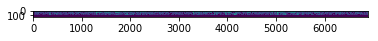

In [135]:
plt.imshow(Xdb_train[0])

In [128]:
num_classes = 2
batch_size = 10
epochs = 10

# convert class vectors to binary class matrices
phq8_array_train = keras.utils.to_categorical(phq8_array_train, num_classes)
phq8_array_test = keras.utils.to_categorical(phq8_array_test, num_classes)

In [73]:
#Red neuronal


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(129,6891,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 127, 6889, 32)     320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 3444, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 3442, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 1721, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 1719, 128)     73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 859, 128)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 857, 256)      295168    
__________

In [129]:
Xdb_train_array = np.ndarray(shape = (107,129,6891))
Xdb_test_array = np.ndarray(shape = (35,129,6891))

In [130]:
i = 0
for train in Xdb_train:
    Xdb_train_array[i] = train
    i += 1
    
i = 0
for train in Xdb_test:
    Xdb_test_array[i] = train
    i += 1

In [131]:
Xdb_train_array = Xdb_train_array.reshape(Xdb_train_array.shape[0], 129, 6891, 1)
Xdb_test_array = Xdb_test_array.reshape(Xdb_test_array.shape[0], 129, 6891, 1)

In [132]:
print (Xdb_train_array.shape)
print (Xdb_test_array.shape)

(107, 129, 6891, 1)
(35, 129, 6891, 1)


In [133]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [134]:
model.fit(Xdb_train_array, phq8_array_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(Xdb_test_array, phq8_array_test))
score = model.evaluate(Xdb_test_array, phq8_array_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 107 samples, validate on 35 samples
Epoch 1/10
107/107 [==============================] - 161s 2s/step - loss: 10.9257 - acc: 0.2991 - val_loss: 10.5919 - val_acc: 0.3429
Epoch 2/10
107/107 [==============================] - 128s 1s/step - loss: 11.5990 - acc: 0.2804 - val_loss: 10.5919 - val_acc: 0.3429
Epoch 3/10
107/107 [==============================] - 127s 1s/step - loss: 11.5990 - acc: 0.2804 - val_loss: 10.5919 - val_acc: 0.3429
Epoch 4/10
107/107 [==============================] - 126s 1s/step - loss: 11.5990 - acc: 0.2804 - val_loss: 10.5919 - val_acc: 0.3429
Epoch 5/10
107/107 [==============================] - 126s 1s/step - loss: 11.5990 - acc: 0.2804 - val_loss: 10.5919 - val_acc: 0.3429
Epoch 6/10
107/107 [==============================] - 126s 1s/step - loss: 11.5990 - acc: 0.2804 - val_loss: 10.5919 - val_acc: 0.3429
Epoch 7/10
107/107 [==============================] - 126s 1s/step - loss: 11.5990 - acc: 0.2804 - val_loss: 10.5919 - val_acc: 0.3429
Epoch 8/10

In [ ]:
#prediccion = model.predict(Xdb_test, batch_size=batch_size, verbose=1, steps=None)